<h3>Task 5 - Predictive Health Care</h3>
Comparing adverse effects of pain medicaments

<h3>Task Overview</h3>

<b>What you'll learn</b>
 - How to analyze adverse drug effects using provided data.

<b>What you'll do</b>
 - Analyze 2019 FAERS data to find the top 10 Tramal adverse effects.
 - Compare Tramal and Lyrica's adverse effects.
 - Suggest further investigations based on dataset findings.

<h3>Here is your task:</h3>

<b>Jakob asks you to create a PowerPoint slide deck while tackling the following steps. Use screenshots and diagrams to illustrate your findings as well.</b>

<b>Step 1</b>

Create a descriptive overview of adverse effects of tramal based on the available FAERS datasets, which you’ll find in your resource section. For your analysis, only use the FAERS data from the year 2019.

Show the 10 most common adverse effects as they are reported in the FAERS database. Jakob loves bar plots, so would be great if you use one.

<b>Step 2</b>

Compare tramal to another medication called lyrica that is also commonly used to treat neurological pain. Are the adverse effects similar?

Use Rscript to solve the task and make sure using it in your presentation.

</b>Step 3</b>

Define what further investigations might be helpful in determining whether a certain drug might be more preferable over another drug. Base your solution on the results of your dataset work.

In [3]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# read the dataset (Quarter 1)
DEMO19Q1 = pd.read_csv("E:\iNeuron\Dataset\Q1\DEMO19Q1.txt", delimiter="$", low_memory=False)
DRUG19Q1 = pd.read_csv("E:\iNeuron\Dataset\Q1\DRUG19Q1.txt", delimiter="$", low_memory=False)
REAC19Q1 = pd.read_csv("E:\iNeuron\Dataset\Q1\REAC19Q1.txt", delimiter="$", low_memory=False)

In [5]:
# select columns necessary for our analysis
DEMO19Q1 = DEMO19Q1[["primaryid", "caseid", "age", "sex"]]
DRUG19Q1 = DRUG19Q1[["primaryid", "caseid", "drugname"]]
REAC19Q1 = REAC19Q1[["primaryid", "caseid", "pt"]]

In [6]:
# create a function to clean the data
def primary_clean(data):
    data = data.drop_duplicates()
    data = data.dropna()
    print(data.shape)
    print(data.isnull().sum())
    print(data.duplicated().sum())
    return data

In [7]:
# clean each dataset
DEMO19Q1 = primary_clean(DEMO19Q1)

(226536, 4)
primaryid    0
caseid       0
age          0
sex          0
dtype: int64
0


In [8]:
# clean each dataset
DRUG19Q1 = primary_clean(DRUG19Q1)

(1381706, 3)
primaryid    0
caseid       0
drugname     0
dtype: int64
0


In [9]:
# clean each dataset
REAC19Q1 = primary_clean(REAC19Q1)

(1303521, 3)
primaryid    0
caseid       0
pt           0
dtype: int64
0


In [10]:
# create a function to merge and clean dataset
def merge_data(data1, data2, data3):
    data = pd.merge(left=data1, right=data2, how="left", on=["primaryid", "caseid"])
    final = pd.merge(left=data, right=data3, how="left", on=["primaryid", "caseid"])
    final = final.drop_duplicates()
    final = final.dropna()
    print(final.shape)
    print(final.isnull().sum())
    print(final.duplicated().sum())
    final["drugname"] = final["drugname"].replace(to_replace="GABAPENTIN.", value="GABAPENTIN")
    final = final[(final['drugname']=="GABAPENTIN") | (final['drugname']=="LYRICA") | (final['drugname']=="TRAMAL")]
    final = final.reset_index(drop="index")
    print(final.shape)
    return final

In [11]:
# merge and clean
Quarter1 = merge_data(DEMO19Q1, DRUG19Q1, REAC19Q1)

(4407726, 6)
primaryid    0
caseid       0
age          0
sex          0
drugname     0
pt           0
dtype: int64
0
(50134, 6)


In [12]:
# read the dataset (Quarter 2)
DEMO19Q2 = pd.read_csv("E:\iNeuron\Dataset\Q2\DEMO19Q2.txt", delimiter="$", low_memory=False)
DRUG19Q2 = pd.read_csv("E:\iNeuron\Dataset\Q2\DRUG19Q2.txt", delimiter="$", low_memory=False)
REAC19Q2 = pd.read_csv("E:\iNeuron\Dataset\Q2\REAC19Q2.txt", delimiter="$", low_memory=False)

In [13]:
# select columns necessary for our analysis
DEMO19Q2 = DEMO19Q2[["primaryid", "caseid", "age", "sex"]]
DRUG19Q2 = DRUG19Q2[["primaryid", "caseid", "drugname"]]
REAC19Q2 = REAC19Q2[["primaryid", "caseid", "pt"]]

In [14]:
# clean each dataset
DEMO19Q2 = primary_clean(DEMO19Q2)

(241381, 4)
primaryid    0
caseid       0
age          0
sex          0
dtype: int64
0


In [15]:
# clean each dataset
DRUG19Q2 = primary_clean(DRUG19Q2)

(1551080, 3)
primaryid    0
caseid       0
drugname     0
dtype: int64
0


In [16]:
# clean each dataset
REAC19Q2 = primary_clean(REAC19Q2)

(1408475, 3)
primaryid    0
caseid       0
pt           0
dtype: int64
0


In [17]:
# merge and clean
Quarter2 = merge_data(DEMO19Q2, DRUG19Q2, REAC19Q2)

(4892508, 6)
primaryid    0
caseid       0
age          0
sex          0
drugname     0
pt           0
dtype: int64
0
(59589, 6)


In [18]:
# read the dataset (Quarter 3)
DEMO19Q3 = pd.read_csv("E:\iNeuron\Dataset\Q3\DEMO19Q3.txt", delimiter="$", low_memory=False)
REAC19Q3 = pd.read_csv("E:\iNeuron\Dataset\Q3\REAC19Q3.txt", delimiter="$", low_memory=False)
DRUG19Q3 = pd.read_csv("E:\iNeuron\Dataset\Q3\DRUG19Q3.txt", delimiter="$", low_memory=False, encoding_errors='ignore')

In [19]:
# select columns necessary for our analysis
DEMO19Q3 = DEMO19Q3[["primaryid", "caseid", "age", "sex"]]
DRUG19Q3 = DRUG19Q3[["primaryid", "caseid", "drugname"]]
REAC19Q3 = REAC19Q3[["primaryid", "caseid", "pt"]]

In [20]:
# clean each dataset
DEMO19Q3 = primary_clean(DEMO19Q3)

(253952, 4)
primaryid    0
caseid       0
age          0
sex          0
dtype: int64
0


In [21]:
# clean each dataset
DRUG19Q3 = primary_clean(DRUG19Q3)

(1651755, 3)
primaryid    0
caseid       0
drugname     0
dtype: int64
0


In [22]:
# clean each dataset
REAC19Q3 = primary_clean(REAC19Q3)

(1504784, 3)
primaryid    0
caseid       0
pt           0
dtype: int64
0


In [23]:
# merge and clean
Quarter3 = merge_data(DEMO19Q3, DRUG19Q3, REAC19Q3)

(5540978, 6)
primaryid    0
caseid       0
age          0
sex          0
drugname     0
pt           0
dtype: int64
0
(62882, 6)


In [24]:
# read the dataset (Quarter 4)
DEMO19Q4 = pd.read_csv("E:\iNeuron\Dataset\Q4\DEMO19Q4.txt", delimiter="$", low_memory=False)
REAC19Q4 = pd.read_csv("E:\iNeuron\Dataset\Q4\REAC19Q4.txt", delimiter="$", low_memory=False)
DRUG19Q4 = pd.read_csv("E:\iNeuron\Dataset\Q4\DRUG19Q4.txt", delimiter="$", low_memory=False)

In [25]:
# select columns necessary for our analysis
DEMO19Q4 = DEMO19Q4[["primaryid", "caseid", "age", "sex"]]
DRUG19Q4 = DRUG19Q4[["primaryid", "caseid", "drugname"]]
REAC19Q4 = REAC19Q4[["primaryid", "caseid", "pt"]]

In [26]:
# clean each dataset
DEMO19Q4 = primary_clean(DEMO19Q4)

(245213, 4)
primaryid    0
caseid       0
age          0
sex          0
dtype: int64
0


In [27]:
# clean each dataset
DRUG19Q4 = primary_clean(DRUG19Q4)

(1417965, 3)
primaryid    0
caseid       0
drugname     0
dtype: int64
0


In [28]:
# clean each dataset
REAC19Q4 = primary_clean(REAC19Q4)

(1359912, 3)
primaryid    0
caseid       0
pt           0
dtype: int64
0


In [29]:
# merge and clean
Quarter4 = merge_data(DEMO19Q4, DRUG19Q4, REAC19Q4)

(4879124, 6)
primaryid    0
caseid       0
age          0
sex          0
drugname     0
pt           0
dtype: int64
0
(53822, 6)


In [30]:
# concatenate all Quarter data into one for our analysis
final_data = pd.concat([Quarter1, Quarter2, Quarter3, Quarter4], ignore_index=True)

# check null/missing values
print(final_data.isnull().sum())

# check any duplicate records
print(final_data.duplicated().sum())

# check the dimension of data
final_data.shape

primaryid    0
caseid       0
age          0
sex          0
drugname     0
pt           0
dtype: int64
0


(226427, 6)

In [31]:
# save the dataset as excel and csv files for further use in PowerBI/Tableau
# final_data.to_csv("final_data.csv", index=False)
# final_data.to_excel("final_data.xlsx", index=False)

In the above steps, we read the datasets from each quarter, selected columns necessary for our analysis, performed data cleaning, selected data specific to the drugs mentioned in the problem statement, then we concatenated all the quarters into one to create a final data which is saved as csv and excel files for further analysis.

<h3>Descriptive Statistics</h3>

In [32]:
faers_data = pd.read_csv("final_data.csv")

In [33]:
# check first few records
faers_data.head()

,primaryid,caseid,age,sex,drugname,pt
0,100244892,10024489,57.0,F,LYRICA,Arthritis
1,100244892,10024489,57.0,F,LYRICA,Balance disorder
2,100244892,10024489,57.0,F,LYRICA,Foot deformity
3,100244892,10024489,57.0,F,LYRICA,Intentional product misuse
4,100244892,10024489,57.0,F,LYRICA,Ligament sprain


In [34]:
# check dimension
faers_data.shape

(226427, 6)

In [35]:
# datatypes
faers_data.dtypes

primaryid      int64
caseid         int64
age          float64
sex           object
drugname      object
pt            object
dtype: object

In [36]:
# descriptive statistics
faers_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
primaryid,226427.0,NaN,NaN,NaN,277405646.388584,357569228.170606,63910632.0,154627665.0,161410644.0,167325443.0,1688095311.0
caseid,226427.0,NaN,NaN,NaN,15314969.306576,1753554.412448,6391063.0,14735225.0,15943146.0,16451519.0,17267527.0
age,226427.0,NaN,NaN,NaN,660.450825,3606.365337,0.0,51.0,61.0,70.0,33165.0
sex,226427,6,F,159999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drugname,226427,3,GABAPENTIN,117657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pt,226427,5520,Pain,4438,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# concise info
faers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226427 entries, 0 to 226426
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   primaryid  226427 non-null  int64  
 1   caseid     226427 non-null  int64  
 2   age        226427 non-null  float64
 3   sex        226427 non-null  object 
 4   drugname   226427 non-null  object 
 5   pt         226427 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 10.4+ MB


In [38]:
# considering data for males and females only for EDA and ingoring other records in column "sex"
faers_data = faers_data[(faers_data['sex']=="M") | (faers_data['sex']=="F")]
faers_data.shape

(226399, 6)

### Exploratory Data Analysis (EDA)

In [39]:
# first we will create 3 dataset that corresponds to each drugs under analysis
TRAMAL = faers_data[faers_data['drugname']=="TRAMAL"]
LYRICA = faers_data[faers_data['drugname']=="LYRICA"]
GABAPENTIN = faers_data[faers_data['drugname']=="GABAPENTIN"]

# check the dimensions of each datasets
print("TRAMAL DATASET:", TRAMAL.shape)
print("LYRICA DATASET:", LYRICA.shape)
print("GABAPENTIN DATASET:", GABAPENTIN.shape)

TRAMAL DATASET: (2858, 6)
LYRICA DATASET: (105907, 6)
GABAPENTIN DATASET: (117634, 6)


In [40]:
# TOP 10 effects of mentioned drugs

# TRAMAL
TOP10_TRAMAL = TRAMAL.groupby(['pt']).size().reset_index().rename(columns={0:"counts"}).sort_values(ascending=False, by="counts").head(10)
TOP10_TRAMAL

,pt,counts
522,Nausea,52
643,Pyrexia,41
2,Abdominal pain,35
196,Diarrhoea,31
601,Pneumonia,28
794,White blood cell count increased,26
381,Ileus,25
1,Abdominal distension,25
183,Dementia,24
789,Vomiting,24


In [41]:
# LYRICA
TOP10_LYRICA = LYRICA.groupby(['pt']).size().reset_index().rename(columns={0:"counts"}).sort_values(ascending=False, by="counts").head(10)
TOP10_LYRICA

,pt,counts
2542,Pain,3136
1012,Drug ineffective,2437
2123,Malaise,2088
2470,Off label use,2018
2543,Pain in extremity,1345
1847,Insomnia,1311
1281,Feeling abnormal,1281
3757,Withdrawal syndrome,1236
1268,Fatigue,1211
1857,Intentional product misuse,1205


In [42]:
# GABAPENTIN
TOP10_GABAPENTIN = GABAPENTIN.groupby(['pt']).size().reset_index().rename(columns={0:"counts"}).sort_values(ascending=False, by="counts").head(10)
TOP10_GABAPENTIN

,pt,counts
877,Chronic kidney disease,2435
1246,Drug ineffective,1938
68,Acute kidney injury,1839
1245,Drug hypersensitivity,1762
1524,Fatigue,1758
2981,Off label use,1579
3647,Renal failure,1525
2828,Nausea,1508
3076,Pain,1289
1845,Headache,1222


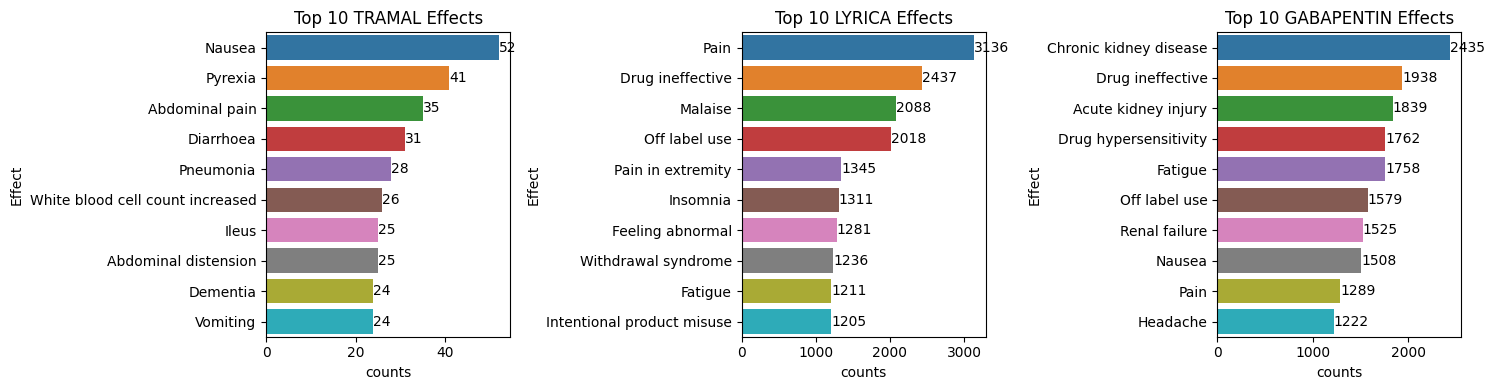

In [43]:
# let's visualize above data
plt.figure(figsize=(15,4))

# TRAMAL
ax1 = plt.subplot2grid((1,3), (0,0))
sns.barplot(y="pt", x='counts', data=TOP10_TRAMAL, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)
plt.ylabel("Effect")
plt.title("Top 10 TRAMAL Effects")

# LYRICA
ax2 = plt.subplot2grid((1,3), (0,1))
sns.barplot(y="pt", x='counts', data=TOP10_LYRICA, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.ylabel("Effect")
plt.title("Top 10 LYRICA Effects")

# GABAPENTIN
ax3 = plt.subplot2grid((1,3), (0,2))
sns.barplot(y="pt", x='counts', data=TOP10_GABAPENTIN, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.ylabel("Effect")
plt.title("Top 10 GABAPENTIN Effects")


plt.tight_layout()
plt.show()
